## Visualizing a Categorical and a Quantitative Variable & Customizing Seaborn Plots

### seaborn의 플롯기능(object type) 은 FacetGrids와 AxesSubplots 두가지 유형의 객체를 생성 
>FacetGrid는 하나 이상의 AxesSubplots으로 구성되며 이것이 서브플롯을 지원하는 방식 replot , catplot

> AxesSubplot은 하나의 플롯을 지원하는 방식 (scatter , count etc .... only create a single plot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

import warnings
warnings.filterwarnings(action= "ignore")

#plt.rcParams['axes.unicode_minus'] = False
#sns.set(font_scale = 1)  
#plt.style.use(['fivethirtyeight'])
# .set_option('display.max_columns', None)

In [2]:
import os 
os.getcwd()
os.chdir('C:\\Users\\my\\Desktop')

In [3]:
df = pd.read_csv("googleplaystore.csv")
display(df.shape, df.head(3))

(10841, 13)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000


In [6]:
play_store = df[~df["Rating"].isnull()]

In [7]:
play_store.Rating.isnull().sum()

0

In [8]:
play_store.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Text(0.5, 1.0, 'distribution of the Ratings')

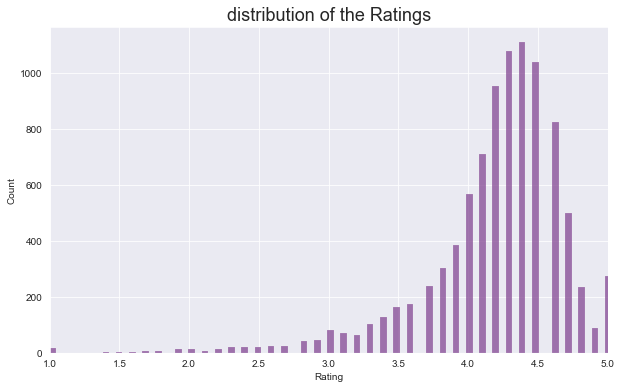

In [9]:
sns.set_style("darkgrid")
sns.set_palette("PRGn")

fig, ax = plt.subplots(figsize = (10,6))

g= sns.histplot(play_store["Rating"])
g.set_xlim(1,5)

g.set_title("distribution of the Ratings", fontsize=18)

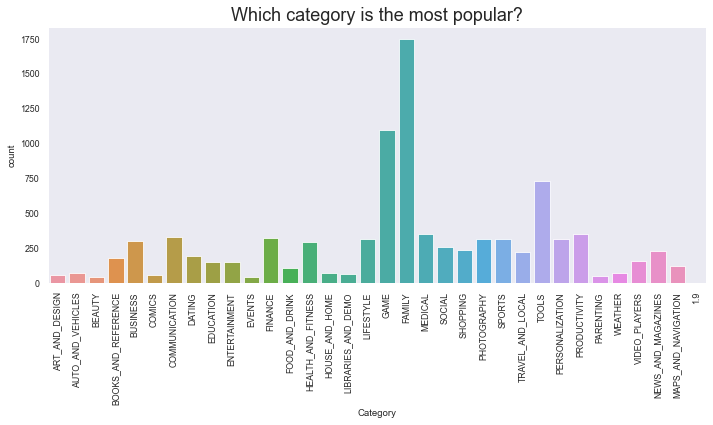

In [10]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("paper")

fig, ax = plt.subplots(figsize = (10,6))

g= sns.countplot(play_store["Category"], data = play_store)

g.set_title("Which category is the most popular?", fontsize = 18)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [11]:
x= play_store.Genres.value_counts().sort_values(ascending =False).head(10)
x.values

array([733, 533, 468, 358, 351, 350, 333, 328, 323, 317], dtype=int64)

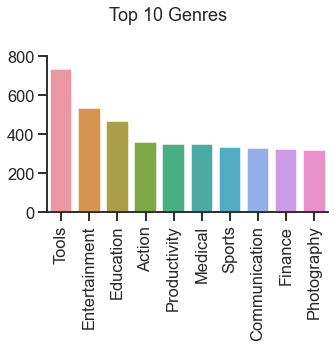

In [12]:
sns.set_style("ticks")
sns.set_context("talk")

g= sns.catplot(x.index ,x.values, data = play_store, kind = "bar")
g.fig.suptitle("Top 10 Genres", fontsize = 18) 
# FacetGrid일때 제목을 주기 위해서는 변수.fig.suptitle(y = 제목 높이설정)

plt.xticks(rotation = 90)
plt.tight_layout()
plt.ylim(0,800)
plt.show()

In [13]:
# Installs 컬럼 전처리 

play_store["Installs"] = play_store["Installs"].str.replace("+","")
play_store["Installs"] = play_store["Installs"].str.replace(",","") 
set(play_store["Installs"])

play_store = play_store[play_store["Installs"]!="Free"]
play_store["Installs"] = play_store["Installs"].astype(int)


""" 다른방법 
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x)) 
"""

" 다른방법 \ndata.Installs = data.Installs.apply(lambda x: x.replace(',',''))\ndata.Installs = data.Installs.apply(lambda x: x.replace('+',''))\ndata.Installs = data.Installs.apply(lambda x: int(x)) \n"

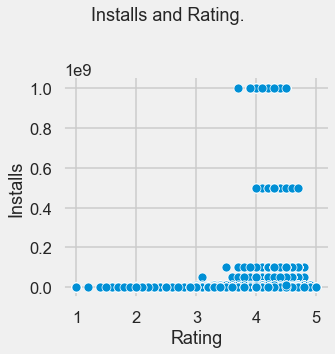

In [14]:
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

sns.set_context("talk")

g= sns.relplot(x= play_store.Rating, y= play_store.Installs, data = play_store)
g.fig.suptitle("Installs and Rating.", fontsize = 18 ,y= 1)
plt.tight_layout()
plt.show()

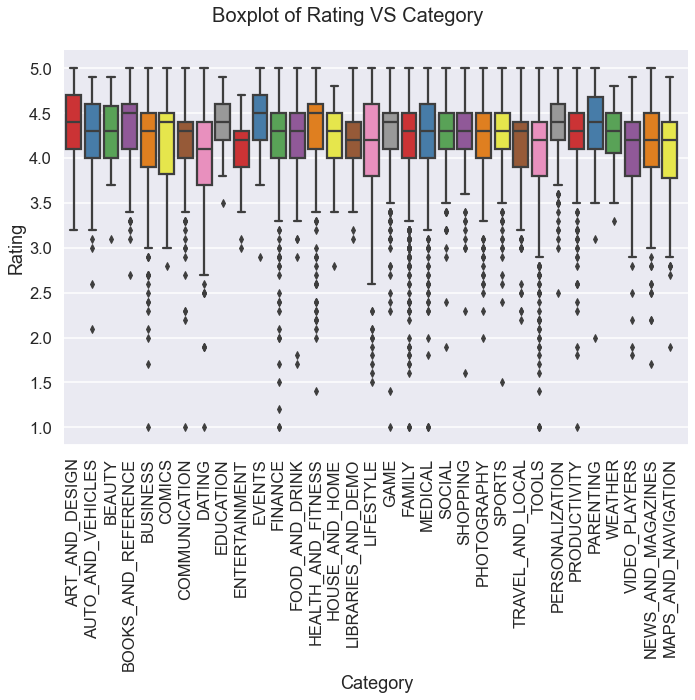

In [15]:
sns.set_style("darkgrid")

g = sns.catplot(x="Category",y="Rating",data=play_store, kind="box", height = 10 ,palette = "Set1")

g.despine(left=True) # Despine (축/테두리 제거)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g = g.set_ylabels("Rating")
g.fig.suptitle('Boxplot of Rating VS Category',size = 20)

plt.tight_layout()
plt.show()

In [16]:
x = play_store.Type.value_counts()
x

Free    8719
Paid     647
Name: Type, dtype: int64

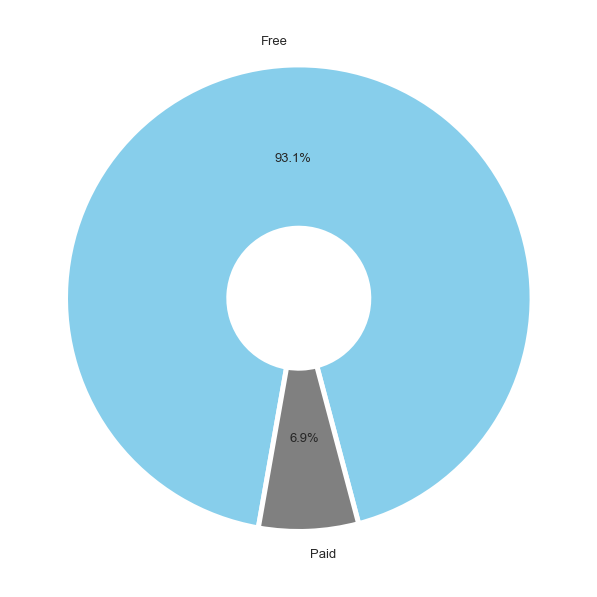

In [17]:
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["skyblue", "gray"]
ax.pie(x = play_store.Type.value_counts(), labels = x.index, autopct='%.1f%%'
      , startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13} ,colors =colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()